<a href="https://colab.research.google.com/github/mJekal/PyTorch_study/blob/main/classfication_basic1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch

In [2]:
N=100
radius1=0.3+0.05*torch.randn(int(N/2),1)
radius2=1+0.01*torch.randn(int(N/2),1)
theta1=2*torch.pi*torch.rand(int(N/2),1)-torch.pi
theta2=2*torch.pi*torch.rand(int(N/2),1)-torch.pi
class1_D=torch.hstack([radius1*torch.cos(theta1), radius1*torch.sin(theta1)])
class2_D=torch.hstack([radius2*torch.cos(theta2), radius2*torch.sin(theta2)])
class1_L=torch.ones(int(N/2),1)
class2_L=torch.zeros(int(N/2),1)
X=torch.vstack([class1_D,class2_D])
y=torch.vstack([class1_L,class2_L])

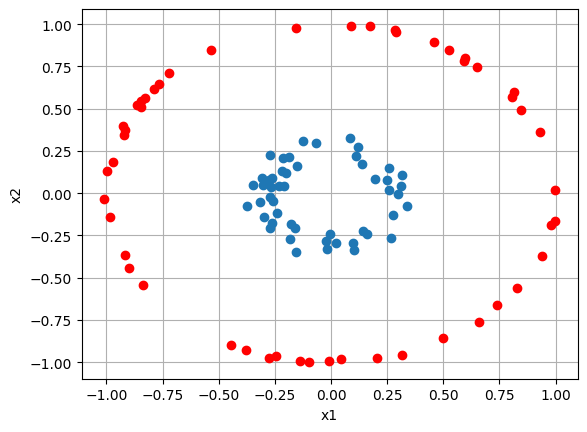

In [3]:
import matplotlib.pyplot as plt
plt.plot(class1_D[:,0],class1_D[:,1],'o')
plt.plot(class2_D[:,0],class2_D[:,1],'ro')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid()

In [4]:
from torch import nn

class MLP(nn.Module):
  def __init__(self):
        super().__init__()

        self.linear = nn.Sequential(nn.Linear(2, 100),
                                    nn.Sigmoid(),
                                    nn.Sequential(*[i for _ in range(10) for i in [nn.Linear(100,100), nn.Sigmoid()]]),
                                    nn.Linear(100, 1),
                                    nn.Sigmoid())

        self.linear = nn.Sequential(nn.Linear(2, 100),
                                    nn.ReLU(),
                                    nn.Sequential(*[i for _ in range(10) for i in [nn.Linear(100,100), nn.ReLU()]]),
                                    nn.Linear(100, 1),
                                    nn.Sigmoid())
  def forward(self,x):
    x = self.linear(x)
    return x

In [5]:
model = MLP()
print(model)
print(model(torch.randn(5,2)).shape)

MLP(
  (linear): Sequential(
    (0): Linear(in_features=2, out_features=100, bias=True)
    (1): ReLU()
    (2): Sequential(
      (0): Linear(in_features=100, out_features=100, bias=True)
      (1): ReLU()
      (2): Linear(in_features=100, out_features=100, bias=True)
      (3): ReLU()
      (4): Linear(in_features=100, out_features=100, bias=True)
      (5): ReLU()
      (6): Linear(in_features=100, out_features=100, bias=True)
      (7): ReLU()
      (8): Linear(in_features=100, out_features=100, bias=True)
      (9): ReLU()
      (10): Linear(in_features=100, out_features=100, bias=True)
      (11): ReLU()
      (12): Linear(in_features=100, out_features=100, bias=True)
      (13): ReLU()
      (14): Linear(in_features=100, out_features=100, bias=True)
      (15): ReLU()
      (16): Linear(in_features=100, out_features=100, bias=True)
      (17): ReLU()
      (18): Linear(in_features=100, out_features=100, bias=True)
      (19): ReLU()
    )
    (3): Linear(in_features=100, out_f

In [6]:
from torch import optim
import torch.nn.functional as F

LR = 1e-4
EPOCH = 500

#  optimizer = optim.SGD(model.parameters(), lr=LR)
optimizer = optim.Adam(model.parameters(), lr=LR)
loss_history = []

model.train()
for ep in range(EPOCH):

    q = model(X)

    loss = F.binary_cross_entropy(q, y)

    # -torch.sum(torch.log(q**y*(1-q)**(1-y)))/N
    # print(F.binary_cross_entropy(q,y))
    # print(-torch.sum(torch.log(q**y*(1-q)**(1-y)))/N)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    loss_history += [loss.item()]
    print(f"Epoch: {ep+1}: loss: {round(loss.item(),3)}")

Epoch: 1: loss: 0.694
Epoch: 2: loss: 0.694
Epoch: 3: loss: 0.694
Epoch: 4: loss: 0.694
Epoch: 5: loss: 0.694
Epoch: 6: loss: 0.694
Epoch: 7: loss: 0.694
Epoch: 8: loss: 0.694
Epoch: 9: loss: 0.694
Epoch: 10: loss: 0.694
Epoch: 11: loss: 0.694
Epoch: 12: loss: 0.694
Epoch: 13: loss: 0.694
Epoch: 14: loss: 0.694
Epoch: 15: loss: 0.694
Epoch: 16: loss: 0.694
Epoch: 17: loss: 0.693
Epoch: 18: loss: 0.693
Epoch: 19: loss: 0.693
Epoch: 20: loss: 0.693
Epoch: 21: loss: 0.693
Epoch: 22: loss: 0.693
Epoch: 23: loss: 0.693
Epoch: 24: loss: 0.693
Epoch: 25: loss: 0.693
Epoch: 26: loss: 0.693
Epoch: 27: loss: 0.693
Epoch: 28: loss: 0.693
Epoch: 29: loss: 0.693
Epoch: 30: loss: 0.693
Epoch: 31: loss: 0.693
Epoch: 32: loss: 0.693
Epoch: 33: loss: 0.693
Epoch: 34: loss: 0.693
Epoch: 35: loss: 0.693
Epoch: 36: loss: 0.693
Epoch: 37: loss: 0.693
Epoch: 38: loss: 0.693
Epoch: 39: loss: 0.693
Epoch: 40: loss: 0.693
Epoch: 41: loss: 0.693
Epoch: 42: loss: 0.693
Epoch: 43: loss: 0.693
Epoch: 44: loss: 0.6

Text(0, 0.5, 'loss')

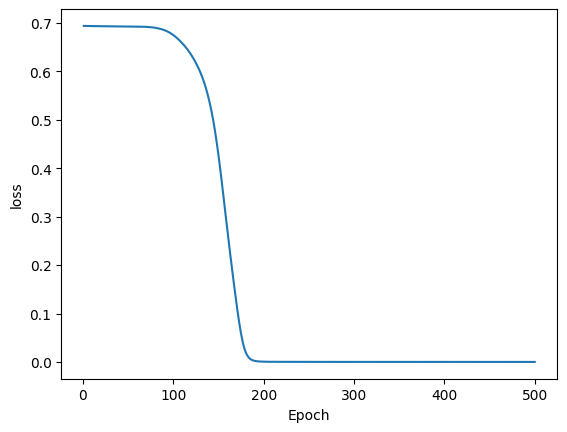

In [7]:
plt.plot(range(1,EPOCH+1),loss_history)
plt.xlabel('Epoch')
plt.ylabel('loss')

In [8]:
x1_T=torch.linspace(-2,2,30)
x2_T=torch.linspace(-2,2,30)

X1_T, X2_T=torch.meshgrid(x1_T,x2_T)
X_T=torch.cat([X1_T.unsqueeze(dim=2), X2_T.unsqueeze(dim=2)], dim=2)

model.eval()
with torch.no_grad():
  Q = model(X_T).squeeze()

/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3526.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


Text(0.5, 0.5, 'x2')

/usr/local/lib/python3.10/dist-packages/mpl_toolkits/mplot3d/proj3d.py:210: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  return np.array([xs, ys, zs, np.ones_like(xs)])
/usr/local/lib/python3.10/dist-packages/mpl_toolkits/mplot3d/proj3d.py:210: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array([xs, ys, zs, np.ones_like(xs)])


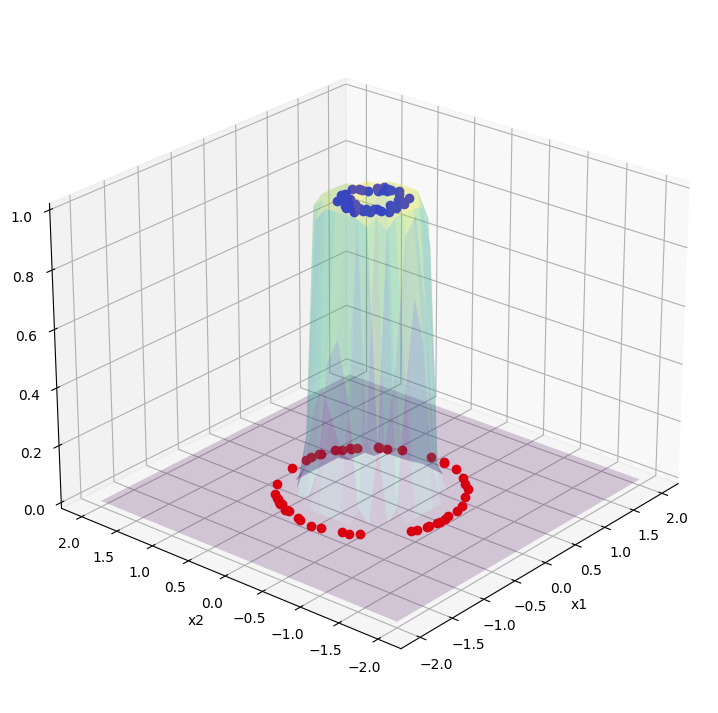

In [9]:
plt.figure(figsize=[10, 9]) # figsize=[가로, 세로]
ax = plt.axes(projection="3d")
ax.view_init(elev=25,azim=-140)
ax.plot_surface(X1_T,X2_T, Q.numpy(), cmap="viridis", alpha=0.2)
plt.plot(class1_D[:,0],class1_D[:,1],class1_L.squeeze(),'bo')
plt.plot(class2_D[:,0],class2_D[:,1],class2_L.squeeze(),'ro')
plt.xlabel("x1")
plt.ylabel("x2")